In [84]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report

import matplotlib.pyplot as plt

import sklearn.preprocessing as skl_pre
import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da
import sklearn.model_selection as skl_ms

from sklearn.model_selection import cross_val_score, cross_val_predict

import sys
sys.path.append('../src')

print('sys:', sys.executable)

from data_preprocessing import df, df_scaled, X, y, X_scaled, training_data_VT2026


sys: c:\Users\shojn\Desktop\smask\machine_learning_project\venv\Scripts\python.exe


In [85]:
#amount of low demand and high demand respectively

amount_high = len(df[df['increase_stock'] == 'high_bike_demand'])
amount_low = len(df[df['increase_stock'] == 'low_bike_demand'])
print(f"High demand: {amount_high}, Low demand: {amount_low}")
partion_low = amount_low / (amount_low + amount_high)
print(f"Partition of low demand: {partion_low:.2f}")
y.head()


High demand: 288, Low demand: 1312
Partition of low demand: 0.82


0    low_bike_demand
1    low_bike_demand
2    low_bike_demand
3    low_bike_demand
4    low_bike_demand
Name: increase_stock, dtype: str

In [86]:
df_head = df.head()
df_scaled_head = df_scaled.head()
print(df_head)


   holiday  weekday  summertime  temp   dew  humidity  precip  windspeed  \
0        0        0           0  -7.2 -15.0     53.68     0.0       16.3   
1        0        1           0  -1.3 -12.8     40.97     0.0       23.9   
2        0        1           1  26.9  21.8     73.39     0.0        0.0   
3        0        0           0   3.1  -4.0     59.74     0.0       19.2   
4        0        1           0  11.7 -11.4     18.71     0.0       10.5   

   cloudcover  visibility  ... hour_of_the_day_sin  hour_of_the_day_cos  \
0        31.6        16.0  ...            0.965926             0.258819   
1        85.7        16.0  ...           -0.707107             0.707107   
2        81.1        16.0  ...           -0.707107             0.707107   
3         0.0        16.0  ...            0.258819             0.965926   
4        44.6        16.0  ...           -0.965926            -0.258819   

   day_0  day_1  day_2  day_3  day_4  day_5  day_6  snow_or_not  
0  False  False  False  Fa

In [49]:
#print(df_scaled_head)
print('x scaled ', X_scaled.head())


x scaled      holiday   weekday  summertime      temp       dew  humidity    precip  \
0 -0.185094 -1.564697   -1.344254 -2.419627 -2.269781 -0.537283 -0.132609   
1 -0.185094  0.639101   -1.344254 -1.782607 -2.050293 -1.203654 -0.132609   
2 -0.185094  0.639101    0.743907  1.262128  1.401656  0.496090 -0.132609   
3 -0.185094 -1.564697   -1.344254 -1.307542 -1.172340 -0.219564 -0.132609   
4 -0.185094  0.639101   -1.344254 -0.379006 -1.910618 -2.370721 -0.132609   

   windspeed  cloudcover  visibility  ...  hour_of_the_day_sin  \
0   0.414935   -0.999503    0.282338  ...             1.371739   
1   1.395045    0.652979    0.282338  ...            -1.013450   
2  -1.687144    0.512472    0.282338  ...            -1.013450   
3   0.788924   -1.964724    0.282338  ...             0.363639   
4  -0.333044   -0.602419    0.282338  ...            -1.382440   

   hour_of_the_day_cos  day_0  day_1  day_2  day_3  day_4  day_5  day_6  \
0             0.367380  False  False  False  False  Fal

In [87]:
print('x', X.head())

x    holiday  weekday  summertime  temp   dew  humidity  precip  windspeed  \
0        0        0           0  -7.2 -15.0     53.68     0.0       16.3   
1        0        1           0  -1.3 -12.8     40.97     0.0       23.9   
2        0        1           1  26.9  21.8     73.39     0.0        0.0   
3        0        0           0   3.1  -4.0     59.74     0.0       19.2   
4        0        1           0  11.7 -11.4     18.71     0.0       10.5   

   cloudcover  visibility  ...  hour_of_the_day_sin  hour_of_the_day_cos  \
0        31.6        16.0  ...             0.965926             0.258819   
1        85.7        16.0  ...            -0.707107             0.707107   
2        81.1        16.0  ...            -0.707107             0.707107   
3         0.0        16.0  ...             0.258819             0.965926   
4        44.6        16.0  ...            -0.965926            -0.258819   

   day_0  day_1  day_2  day_3  day_4  day_5  day_6  snow_or_not  
0  False  False  F

LDA assumes that the covarainces are the same across classes. If this assumption is violated, QDA may perform better. However, QDA is more prone to overfitting, especially with small sample sizes, because it estimates a separate covariance matrix for each class.

In [51]:
#compare covariances between classes
#scale to be able to interpret the results
from sklearn.preprocessing import StandardScaler

labels = y.unique()
cov1 = X_scaled[y == labels[0]].cov()
cov2 = X_scaled[y == labels[1]].cov()

diff = cov1 - cov2
fro_norm = np.linalg.norm(diff)  # storleken på skillnaden
#print(f"Frobeniusnormen av skillnaden mellan {labels[0]} och {labels[1]}: {fro_norm:.2f}")

try out models with differnt adjustments on data

LDA without k-fold cross-validation, unscaled and scaled

                  precision    recall  f1-score   support

high_bike_demand       0.43      0.40      0.42        50
 low_bike_demand       0.89      0.90      0.90       270

        accuracy                           0.82       320
       macro avg       0.66      0.65      0.66       320
    weighted avg       0.82      0.82      0.82       320

unscaled: 0.1750, scaled: 0.1469


LDA with k-fold cross-validation, scaled and unsaled

In [76]:
def lda_kfold_auto(X, y, X_scaled):
    model = skl_da.LinearDiscriminantAnalysis(priors=[0.5, 0.5], solver='lsqr', shrinkage=0.5)
    n_folds = 10
    # Cross-validation utan skalning
    scores_unscaled = cross_val_score(model, X, y, cv=n_folds)
    mean_error_unscaled = 1 - np.mean(scores_unscaled)

    # Cross-validation med skalad data
    scores_scaled = cross_val_score(model, X_scaled, y, cv=n_folds)
    mean_error_scaled = 1 - np.mean(scores_scaled)

    # Prediktioner för classification report (utan skalning)
    y_pred_unscaled = cross_val_predict(model, X, y, cv=n_folds)
    #print("Classification report (unscaled):")
    #print(classification_report(y, y_pred_unscaled))

    # Prediktioner för classification report (med skalning)
    y_pred_scaled = cross_val_predict(model, X_scaled, y, cv=n_folds)
    print("Classification report (scaled):")
    print(classification_report(y, y_pred_scaled))

    #return f"unscaled error: {mean_error_unscaled:.4f}, scaled error: {mean_error_scaled:.4f}"
#print(lda_kfold_auto(X, y, X_scaled))

In [77]:
def qda_kfold_auto(X, y, X_scaled):
    # QDA med jämna priors
    model = skl_da.QuadraticDiscriminantAnalysis(reg_param=0.6) 
    n_folds = 10

    # Cross-validation utan skalning
    scores_unscaled = cross_val_score(model, X, y, cv=n_folds)
    mean_error_unscaled = 1 - np.mean(scores_unscaled)

    # Cross-validation med skalad data
    scores_scaled = cross_val_score(model, X_scaled, y, cv=n_folds)
    mean_error_scaled = 1 - np.mean(scores_scaled)

    # Prediktioner för classification report (utan skalning)
    y_pred_unscaled = cross_val_predict(model, X, y, cv=n_folds)
    #print("Classification report (unscaled):")
    #print(classification_report(y, y_pred_unscaled))

    # Prediktioner för classification report (med skalning)
    y_pred_scaled = cross_val_predict(model, X_scaled, y, cv=n_folds)
    print("Classification report (scaled):")
    print(classification_report(y, y_pred_scaled))

    #return f"unscaled error: {mean_error_unscaled:.4f}, scaled error: {mean_error_scaled:.4f}"

# Kör funktionen


unscaled: 0.1369, scaled: 0.1369


QDA without k-fold cross-validation, unscaled and scaled

unscaled: 0.1937, scaled: 0.1562


QDA with k-fold cross-validation, unscaled and scaled

unscaled: 0.1725, scaled: 0.1437


Running LDA on original data:
Classification report (scaled):
                  precision    recall  f1-score   support

high_bike_demand       0.45      0.88      0.59       288
 low_bike_demand       0.97      0.76      0.85      1312

        accuracy                           0.78      1600
       macro avg       0.71      0.82      0.72      1600
    weighted avg       0.87      0.78      0.81      1600

Running LDA on windspeed_sqrt data:
Classification report (scaled):
                  precision    recall  f1-score   support

high_bike_demand       0.45      0.87      0.60       288
 low_bike_demand       0.96      0.77      0.86      1312

        accuracy                           0.79      1600
       macro avg       0.71      0.82      0.73      1600
    weighted avg       0.87      0.79      0.81      1600

Running LDA on no_weekday data:
Classification report (scaled):
                  precision    recall  f1-score   support

high_bike_demand       0.45      0.87      0.

<Axes: >

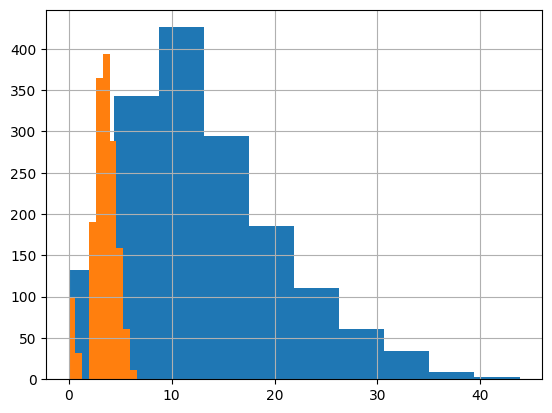

In [91]:
df1 = df.copy()
resuts = {}
#square root the windspeed since it is right skewed

df1['windspeed_sqrt'] = np.sqrt(df1['windspeed'])
X_1 = df1.drop('increase_stock', axis=1)
X_1_scaled = skl_pre.StandardScaler().fit_transform(X_1)
X_1 = pd.DataFrame(X_1, columns=X_1.columns)
X_1_scaled = pd.DataFrame(X_1_scaled, columns=X_1.columns)

df2 = df1.copy()
df2.drop('weekday', axis=1, inplace=True)
X_2 = df2.drop('increase_stock', axis=1)
X_2_scaled = skl_pre.StandardScaler().fit_transform(X_2)
X_2 = pd.DataFrame(X_2, columns=X_2.columns)
X_2_scaled = pd.DataFrame(X_2_scaled, columns=X_2.columns)

df3 = df2.copy()
df3.drop('humidity', axis=1, inplace=True)
X_3 = df3.drop('increase_stock', axis=1)
X_3_scaled = skl_pre.StandardScaler().fit_transform(X_3)
X_3 = pd.DataFrame(X_3, columns=X_3.columns)
X_3_scaled = pd.DataFrame(X_3_scaled, columns=X_3.columns)

df4= df3.copy()
df4.drop('summertime', axis=1, inplace=True)
X_4 = df4.drop('increase_stock', axis=1)
X_4_scaled = skl_pre.StandardScaler().fit_transform(X_4)
X_4 = pd.DataFrame(X_4, columns=X_4.columns)
X_4_scaled = pd.DataFrame(X_4_scaled, columns=X_4.columns)

data_versions = {
    'original': (X, y, X_scaled),
    'windspeed_sqrt': (X_1, y, X_1_scaled),
    'no_weekday': (X_2, y, X_2_scaled),
    'no_humidity': (X_3, y, X_3_scaled),
    'no_summertime': (X_4, y, X_4_scaled)
    
}
models = {
    'LDA': lda_kfold_auto,
    'QDA': qda_kfold_auto
}
for model_name, model_func in models.items():
    for data_name, (X_data, y_data, X_scaled_data) in data_versions.items():
        print(f"Running {model_name} on {data_name} data:")
        result = model_func(X_data, y_data, X_scaled_data)
        resuts[f"{model_name}_{data_name}"] = result

df.windspeed.hist()
df1.windspeed_sqrt.hist()


In [90]:
X_3.head()

,holiday,summertime,temp,dew,precip,windspeed,cloudcover,visibility,month_sin,month_cos,...,hour_of_the_day_cos,day_0,day_1,day_2,day_3,day_4,day_5,day_6,snow_or_not,windspeed_sqrt
0,0,0,-7.2,-15.0,0.0,16.3,31.6,16.0,0.500000,8.660254e-01,...,0.258819,False,False,False,False,False,True,False,0,4.037326
1,0,0,-1.3,-12.8,0.0,23.9,85.7,16.0,0.500000,8.660254e-01,...,0.707107,False,False,False,False,True,False,False,0,4.888763
2,0,1,26.9,21.8,0.0,0.0,81.1,16.0,-0.866025,-5.000000e-01,...,0.707107,False,False,False,True,False,False,False,0,0.000000
3,0,0,3.1,-4.0,0.0,19.2,0.0,16.0,0.500000,8.660254e-01,...,0.965926,False,False,False,False,False,False,True,0,4.381780
4,0,0,11.7,-11.4,0.0,10.5,44.6,16.0,1.000000,6.123234e-17,...,-0.258819,True,False,False,False,False,False,False,0,3.240370


In [32]:
from sklearn.model_selection import GridSearchCV
lda_ = skl_da.LinearDiscriminantAnalysis()
param_grid = [
    {
        'solver': ['svd']
    },
    {
        'solver': ['lsqr', 'eigen'],
        'shrinkage': ['auto', 0.1, 0.5]
    }
]
grid = GridSearchCV(lda_, param_grid, cv=5)
grid.fit(X_scaled, y)
# Visa bästa CV-score



,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",LinearDiscriminantAnalysis()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","[{'solver': ['svd']}, {'shrinkage': ['auto', 0.1, ...], 'solver': ['lsqr', 'eigen']}]"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the sco

In [27]:
qda_ = skl_da.QuadraticDiscriminantAnalysis()
# Parameterrutnät för GridSearch
param_grid = {
    'reg_param': [0.5, 0.7, 0.9, 1.0]
}

# GridSearchCV med 5-fold cross-validation
grid = GridSearchCV(qda_, param_grid, cv=5)

# Fit på dina features och target
grid.fit(X_scaled, y)

print(grid.best_params_)
print("Bästa reg_param:", grid.best_params_)

# Visa bästa CV-score
print("Bästa CV-score:", grid.best_score_)

{'reg_param': 0.9}
Bästa reg_param: {'reg_param': 0.9}
Bästa CV-score: 0.85875
